In [4]:
# !pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)
Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl (276.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\admin\\anaconda3\\envs\\general_func\\Lib\\site-packages\\tensorflow\\include\\absl\\synchronization\\barrier.h'
Consider using the `--user` option or check the permissions.



In [92]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [93]:
import cv2
import imghdr

In [94]:
data_dir = 'Image_Classifier_data'

In [95]:
image_exts = ['jpeg', 'jpg', 'bmp','png']

In [96]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [97]:
img = cv2.imread(os.path.join(data_dir, 'not_stop', '101.jpg'))

In [98]:
img.shape

(1080, 1920, 3)

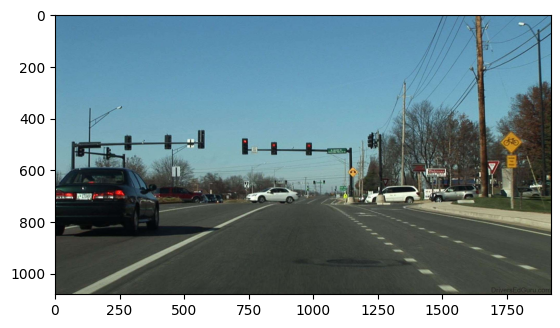

In [99]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Loading Data

In [100]:
cv2??

In [101]:
import numpy as np

In [102]:
tf.keras.utils.image_dataset_from_directory('Image_Classifier_data')

Found 194 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [103]:
data = tf.keras.utils.image_dataset_from_directory('Image_Classifier_data')

Found 194 files belonging to 2 classes.


In [104]:
data.as_numpy_iterator()

In [105]:
data_iterator = data.as_numpy_iterator()

In [106]:
data_iterator.next()

(array([[[[163.43945 , 204.43945 , 247.21289 ],
          [155.93945 , 196.93945 , 240.93945 ],
          [158.13281 , 199.13281 , 243.13281 ],
          ...,
          [182.58594 , 212.58594 , 248.58594 ],
          [180.85938 , 210.85938 , 246.85938 ],
          [181.85938 , 211.85938 , 247.85938 ]],
 
         [[156.33984 , 197.33984 , 241.33984 ],
          [148.83984 , 189.83984 , 233.83984 ],
          [150.83984 , 191.83984 , 235.83984 ],
          ...,
          [176.24023 , 206.24023 , 242.24023 ],
          [175.41992 , 205.41992 , 241.41992 ],
          [176.5     , 206.5     , 242.5     ]],
 
         [[155.43164 , 196.43164 , 240.43164 ],
          [147.93164 , 188.93164 , 232.93164 ],
          [148.39844 , 189.39844 , 233.39844 ],
          ...,
          [170.86523 , 203.79883 , 238.99805 ],
          [168.36523 , 201.29883 , 236.49805 ],
          [169.83203 , 202.76562 , 237.96484 ]],
 
         ...,
 
         [[223.76953 , 193.4336  , 149.89844 ],
          [215.333

In [107]:
batch = data_iterator.next()

In [108]:
batch[0].shape

(32, 256, 256, 3)

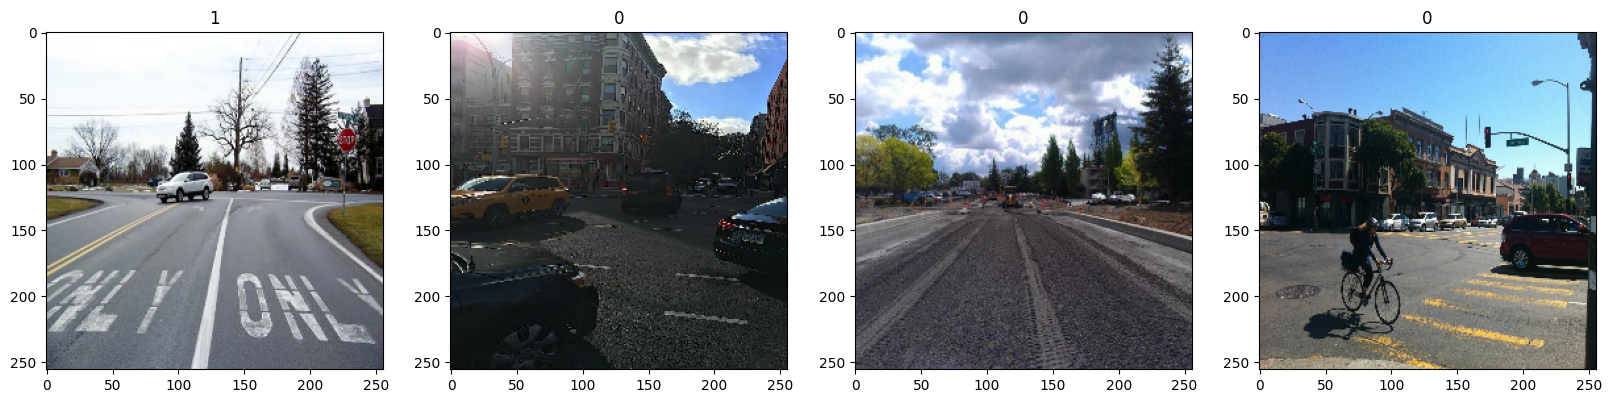

In [109]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess the data

In [110]:
data = data.map(lambda x,y: (x/255, y))

In [111]:
scaled_iterator = data.as_numpy_iterator()

In [112]:
batch = scaled_iterator.next()

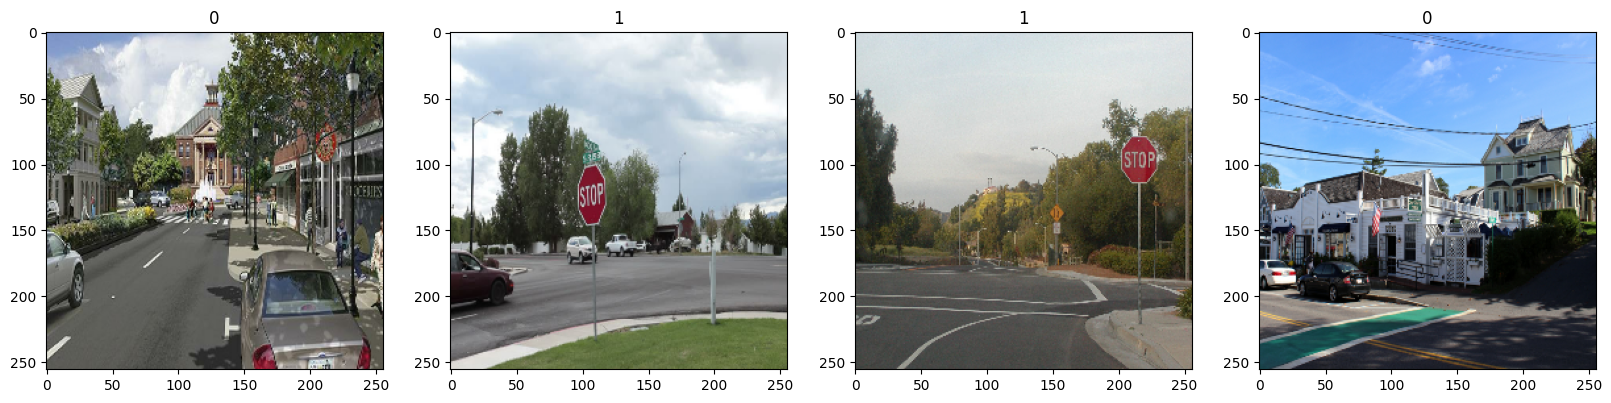

In [113]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [114]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [115]:
test_size+val_size+train_size

7

In [116]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [117]:
len(train)

4

In [118]:
len(val)

2

In [119]:
len(test)

1

In [120]:
test.as_numpy_iterator().next()[0][0].shape

(256, 256, 3)

## Bulding deep learning model

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [149]:
model = Sequential()

In [150]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [151]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [152]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 16)       

## Training Model

In [153]:
logdir = 'Image_Classifier_logs'

In [154]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [155]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 0.7814 - accuracy: 0.5703 - val_loss: 0.8496 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.7191 - accuracy: 0.4844 - val_loss: 0.6692 - val_accuracy: 0.7969
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6466 - accuracy: 0.7266 - val_loss: 0.6549 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.5911 - accuracy: 0.6875 - val_loss: 0.5614 - val_accuracy: 0.6406
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.5694 - accuracy: 0.7188 - val_loss: 0.4688 - val_accuracy: 0.7969
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.4544 - accuracy: 0.8750 - val_loss: 0.3780 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.3267 - accuracy: 0.8750 - val_loss: 0.3945 - val_accuracy: 0.7969
Epoch 8/20
4/4 [=========================

In [156]:
history.history

{'loss': [0.7814332246780396,
  0.7191247940063477,
  0.6465623378753662,
  0.5910652279853821,
  0.5693874955177307,
  0.45441874861717224,
  0.3267412483692169,
  0.42759034037590027,
  0.29760560393333435,
  0.24809424579143524,
  0.19825460016727448,
  0.11901627480983734,
  0.12325666099786758,
  0.07103562355041504,
  0.04706434905529022,
  0.04235697537660599,
  0.03417278453707695,
  0.02507377788424492,
  0.01175024826079607,
  0.007411487400531769],
 'accuracy': [0.5703125,
  0.484375,
  0.7265625,
  0.6875,
  0.71875,
  0.875,
  0.875,
  0.8125,
  0.875,
  0.90625,
  0.9609375,
  0.9921875,
  0.96875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.8495864272117615,
  0.669205904006958,
  0.6548550724983215,
  0.5614461898803711,
  0.46879857778549194,
  0.3779680132865906,
  0.39447247982025146,
  0.249673992395401,
  0.26846587657928467,
  0.2309299260377884,
  0.2230728566646576,
  0.12223996222019196,
  0.08344625681638718,
  0.0

## Performance

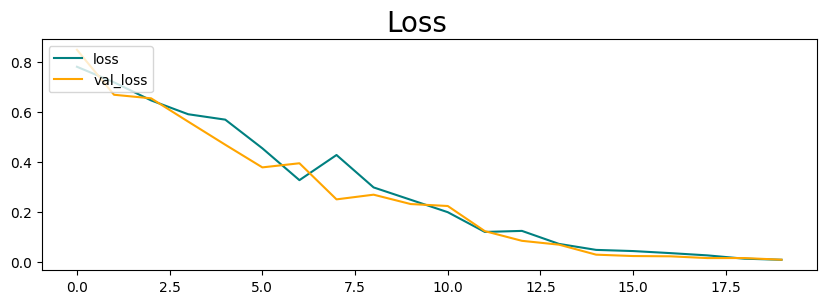

In [157]:
fig = plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

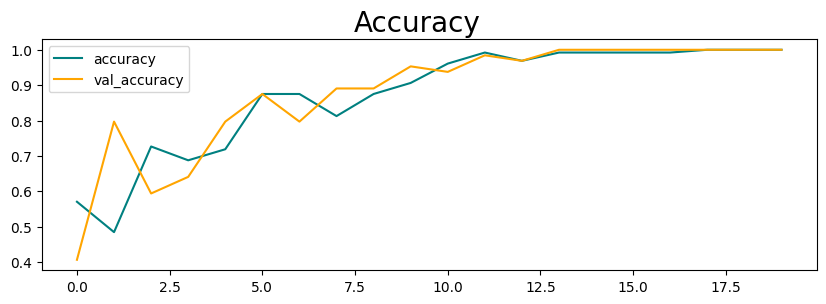

In [158]:
fig = plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating Performance

In [159]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [160]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [161]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 78ms/step


In [162]:
print(f'Precision {pre.result()}, Recall {re.result()}, Accuracy {acc.result()}')

Precision 1.0, Recall 1.0, Accuracy 1.0


## Test

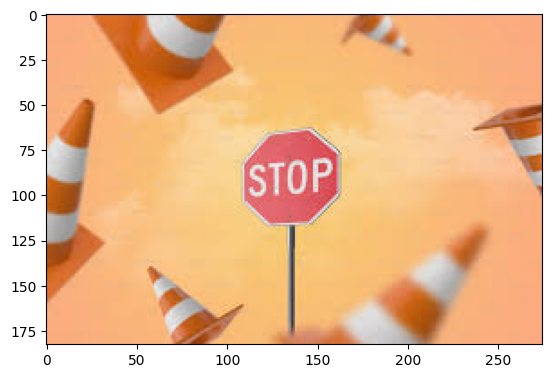

In [163]:
img = cv2.imread('Stop_Test_Image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

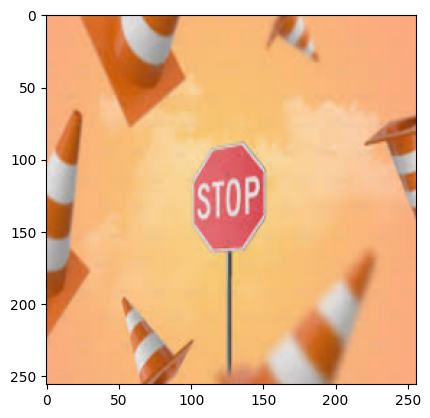

In [164]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [165]:
resize.shape

TensorShape([256, 256, 3])

In [166]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [167]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [168]:
if yhat > 0.5:
    print("Stop")
else:
    print("Not Stop")

Stop


## Saving the Model

In [169]:
model.save(os.path.join('Image_Classifier_Model','Stop_NotStop_Sign_Classifier.keras'))

In [170]:
from tensorflow import keras

In [171]:
loaded_model = keras.models.load_model(os.path.join('Image_Classifier_Model','Stop_NotStop_Sign_Classifier.keras'))

In [172]:
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 82ms/step


In [174]:
yhat

array([[1.]], dtype=float32)

In [175]:
if yhat > 0.5:
    print("Stop")
else:
    print("Not Stop")

Stop
